In [1]:
import pandas as pd 
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
sovenir = pd.read_csv('sovenir.csv', date_parser=True)
sovenir.info()
sovenir.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   obsno       84 non-null     int64  
 1   month_year  84 non-null     object 
 2   sales       84 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


,obsno,month_year,sales
0,1,Jan-87,1664.81
1,2,Feb-87,2397.53
2,3,Mar-87,2840.71
3,4,Apr-87,3547.29
4,5,May-87,3752.96


In [3]:
sovenir.index = pd.DatetimeIndex(sovenir.month_year)
sovenir.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 1987-01-01 to 1993-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   obsno       84 non-null     int64  
 1   month_year  84 non-null     object 
 2   sales       84 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [4]:
sovenir = sovenir.drop(['obsno', 'month_year'], axis=1)
sovenir.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 1987-01-01 to 1993-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [5]:
sovenir.shape #84, 1
sovenir.head()

,sales
month_year,
1987-01-01,1664.81
1987-02-01,2397.53
1987-03-01,2840.71
1987-04-01,3547.29
1987-05-01,3752.96


In [6]:
sovenir.describe()

,sales
count,84.000000
mean,14315.587143
std,15748.840332
min,1664.810000
25%,5884.435000
50%,8771.770000
75%,16888.917500
max,104660.670000


Text(0.5, 1.0, 'Data = sovenir')

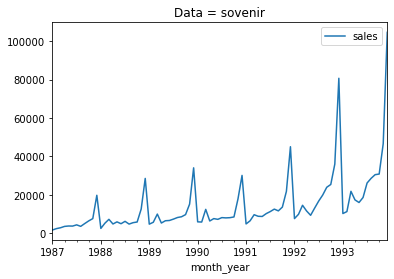

In [7]:
#Lineplot
sovenir.plot()
plt.title('Data = sovenir')

Text(0.5, 1.0, '4yrs Data = sovenir')

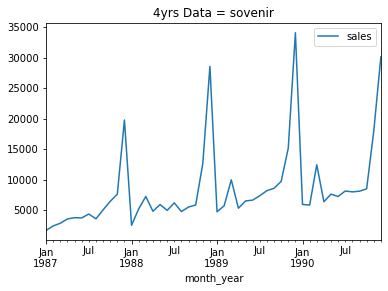

In [8]:
#Lineplot - first 4years
sovenir[:48].plot()
plt.title('4yrs Data = sovenir')

Text(0.5, 1.0, 'Histogram of sovenir Data')

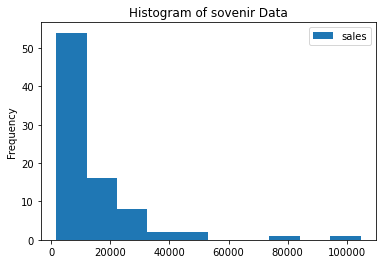

In [9]:
#Histogram
sovenir.plot(kind='hist')
plt.title('Histogram of sovenir Data')

Text(0.5, 1.0, 'Density plot of sovenir Data')

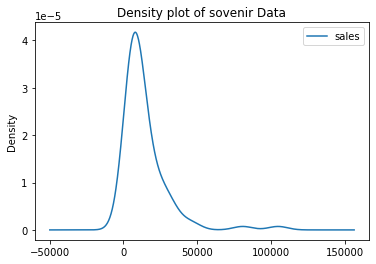

In [10]:
#Density plot
sovenir.plot(kind='kde')
plt.title('Density plot of sovenir Data')

Text(0.5, 1.0, 'Boxplot of sovenir Data')

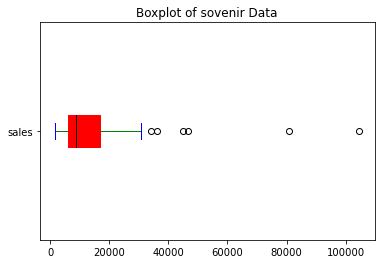

In [11]:
#Boxplot
props2 = dict(boxes = 'red', whiskers ='green', medians = 'black', caps = 'blue')
sovenir.plot.box(color = props2 , patch_artist = True, vert = False)
plt.title('Boxplot of sovenir Data')

In [12]:
#Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# Season Decompose with Multiplicative model
sovenir_dec_m = seasonal_decompose(sovenir, model='multiplicative')

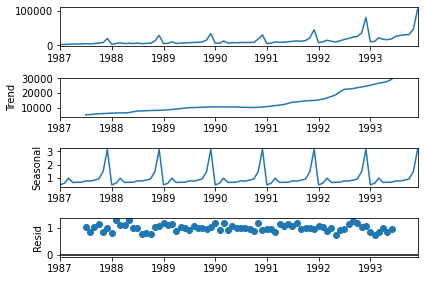

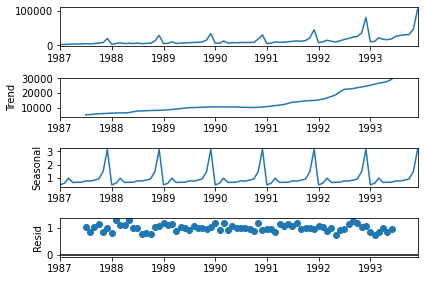

In [13]:
sovenir_dec_m.plot() #Trend & Seasonality visible


In [14]:
sovenir_dec_m.observed
sovenir_dec_m.trend.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months

month_year
1987-01-01            NaN
1987-02-01            NaN
1987-03-01            NaN
1987-04-01            NaN
1987-05-01            NaN
1987-06-01            NaN
1987-07-01    5421.133333
1987-08-01    5572.621250
1987-09-01    5872.002083
1987-10-01    6107.134167
1987-11-01    6249.078333
1987-12-01    6390.100000
1988-01-01    6517.854583
1988-02-01    6643.492917
1988-03-01    6712.677083
1988-04-01    6707.936667
1988-05-01    6891.732500
1988-06-01    7466.107083
1988-07-01    7924.553750
1988-08-01    8037.953750
Name: trend, dtype: float64

In [15]:
sovenir_dec_m.seasonal
sovenir_dec_m.resid.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months


month_year
1987-01-01         NaN
1987-02-01         NaN
1987-03-01         NaN
1987-04-01         NaN
1987-05-01         NaN
1987-06-01         NaN
1987-07-01    1.031436
1987-08-01    0.836602
1987-09-01    1.023443
1987-10-01    1.141145
1987-11-01    0.821944
1987-12-01    0.982328
1988-01-01    0.808217
1988-02-01    1.294932
1988-03-01    1.095080
1988-04-01    1.090826
1988-05-01    1.268746
1988-06-01    0.976121
1988-07-01    1.002384
1988-08-01    0.772859
Name: resid, dtype: float64

In [16]:
# Season Decompose with Additive model
sovenir_dec_a = seasonal_decompose(sovenir, model='additive')

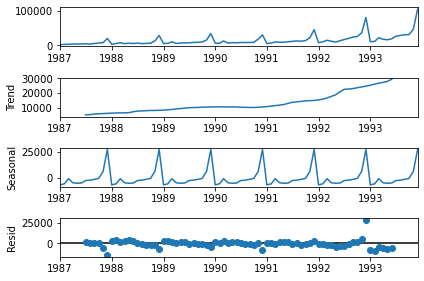

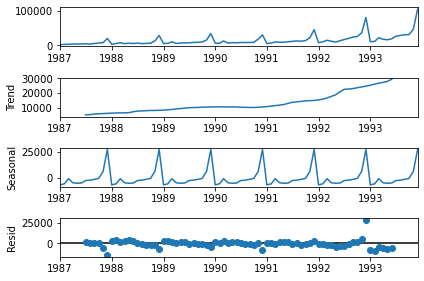

In [17]:
sovenir_dec_a.plot() #Trend & Seasonality visible

In [18]:
sovenir_dec_a.observed
sovenir_dec_a.trend.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months

month_year
1987-01-01            NaN
1987-02-01            NaN
1987-03-01            NaN
1987-04-01            NaN
1987-05-01            NaN
1987-06-01            NaN
1987-07-01    5421.133333
1987-08-01    5572.621250
1987-09-01    5872.002083
1987-10-01    6107.134167
1987-11-01    6249.078333
1987-12-01    6390.100000
1988-01-01    6517.854583
1988-02-01    6643.492917
1988-03-01    6712.677083
1988-04-01    6707.936667
1988-05-01    6891.732500
1988-06-01    7466.107083
1988-07-01    7924.553750
1988-08-01    8037.953750
Name: trend, dtype: float64

In [19]:
sovenir_dec_a.seasonal
sovenir_dec_a.resid.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months


month_year
1987-01-01             NaN
1987-02-01             NaN
1987-03-01             NaN
1987-04-01             NaN
1987-05-01             NaN
1987-06-01             NaN
1987-07-01     1381.112541
1987-08-01       83.138096
1987-09-01      459.334763
1987-10-01      742.152193
1987-11-01    -4990.080376
1987-12-01   -13977.354682
1988-01-01     2632.116916
1988-02-01     4116.852193
1988-03-01     1204.333652
1988-04-01     2699.957957
1988-05-01     4083.386221
1988-06-01     2312.680527
1988-07-01      707.202124
1988-08-01    -1196.384404
Name: resid, dtype: float64

In [20]:
#Applying log on the data
sovenir_log = np.log(sovenir.sales)


Text(0.5, 1.0, 'Data = sovenir_log')

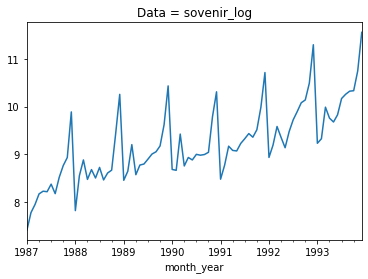

In [21]:
#Lineplot
sovenir_log.plot()
plt.title('Data = sovenir_log')


Text(0.5, 1.0, '4yrs Data = sovenir')

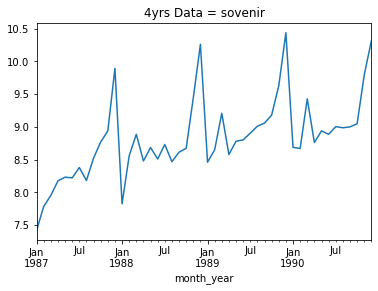

In [22]:
#Lineplot - first 4years
sovenir_log[:48].plot()
plt.title('4yrs Data = sovenir')

Text(0.5, 1.0, 'Histogram of sovenir_log Data')

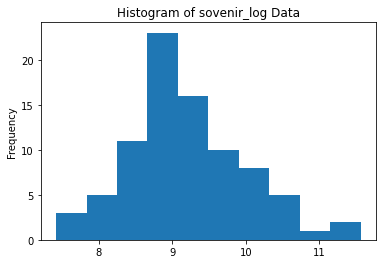

In [23]:
#Histogram
sovenir_log.plot(kind='hist')
plt.title('Histogram of sovenir_log Data')


Text(0.5, 1.0, 'Density plot of sovenir_log Data')

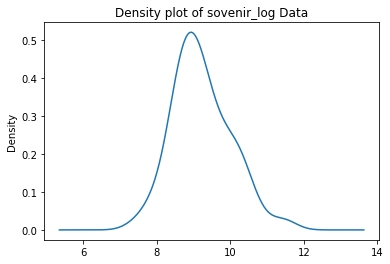

In [24]:
#Density plot
sovenir_log.plot(kind='kde')
plt.title('Density plot of sovenir_log Data')

Text(0.5, 1.0, 'Boxplot of sovenir_log Data')

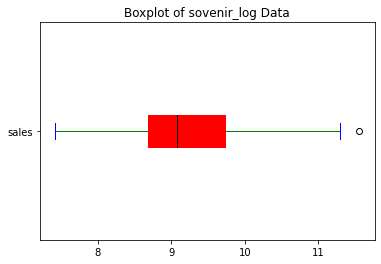

In [25]:
#Boxplot
props2 = dict(boxes = 'red', whiskers ='green', medians = 'black', caps = 'blue')
sovenir_log.plot.box(color = props2 , patch_artist = True, vert = False)
plt.title('Boxplot of sovenir_log Data')


In [26]:
#Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
# Season Decompose with Multiplicative model
sovenir_log_dec_m = seasonal_decompose(sovenir_log, model='multiplicative')


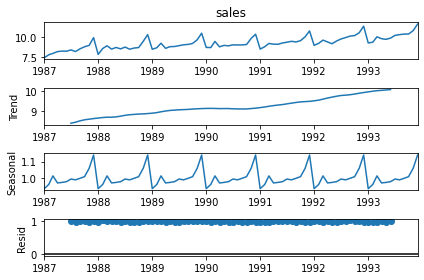

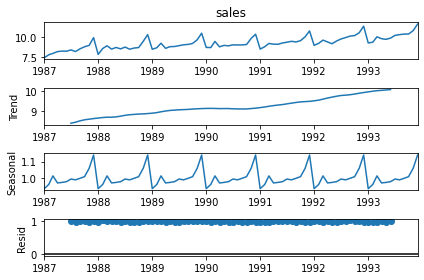

In [28]:
sovenir_log_dec_m.plot() #Trend & Seasonality visible


In [29]:
sovenir_log_dec_m.observed
sovenir_log_dec_m.trend.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months

month_year
1987-01-01         NaN
1987-02-01         NaN
1987-03-01         NaN
1987-04-01         NaN
1987-05-01         NaN
1987-06-01         NaN
1987-07-01    8.387719
1987-08-01    8.436902
1987-09-01    8.508043
1987-10-01    8.559593
1987-11-01    8.591103
1987-12-01    8.621933
1988-01-01    8.648535
1988-02-01    8.675124
1988-03-01    8.690847
1988-04-01    8.690607
1988-05-01    8.707666
1988-06-01    8.744057
1988-07-01    8.785843
1988-08-01    8.816158
Name: trend, dtype: float64

In [30]:
sovenir_log_dec_m.seasonal
sovenir_log_dec_m.resid.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months


month_year
1987-01-01         NaN
1987-02-01         NaN
1987-03-01         NaN
1987-04-01         NaN
1987-05-01         NaN
1987-06-01         NaN
1987-07-01    1.006689
1987-08-01    0.982067
1987-09-01    1.004785
1987-10-01    1.017384
1987-11-01    0.982861
1987-12-01    1.006153
1988-01-01    0.969760
1988-02-01    1.028618
1988-03-01    1.010699
1988-04-01    1.007681
1988-05-01    1.026645
1988-06-01    0.996917
1988-07-01    1.001347
1988-08-01    0.972804
Name: resid, dtype: float64

In [31]:
# Season Decompose with Additive model
sovenir_log_dec_a = seasonal_decompose(sovenir_log, model='additive')

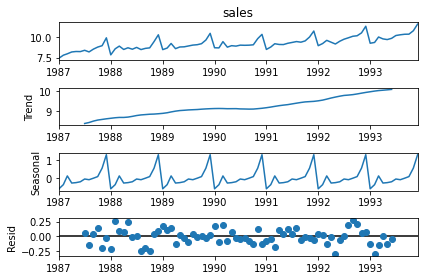

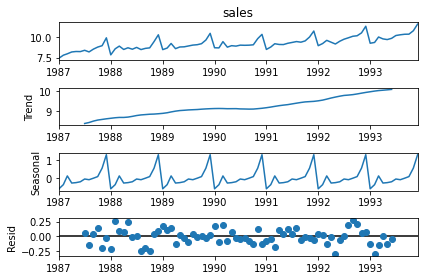

In [32]:
sovenir_log_dec_a.plot() #Trend & Seasonality visible


In [33]:
sovenir_log_dec_a.observed
sovenir_log_dec_a.trend.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months

month_year
1987-01-01         NaN
1987-02-01         NaN
1987-03-01         NaN
1987-04-01         NaN
1987-05-01         NaN
1987-06-01         NaN
1987-07-01    8.387719
1987-08-01    8.436902
1987-09-01    8.508043
1987-10-01    8.559593
1987-11-01    8.591103
1987-12-01    8.621933
1988-01-01    8.648535
1988-02-01    8.675124
1988-03-01    8.690847
1988-04-01    8.690607
1988-05-01    8.707666
1988-06-01    8.744057
1988-07-01    8.785843
1988-08-01    8.816158
Name: trend, dtype: float64

In [34]:
sovenir_log_dec_a.seasonal
sovenir_log_dec_a.resid.head(20) #First 6 and last 6 values are Na's due calculation of seasonality indices of 12 months

month_year
1987-01-01         NaN
1987-02-01         NaN
1987-03-01         NaN
1987-04-01         NaN
1987-05-01         NaN
1987-06-01         NaN
1987-07-01    0.060133
1987-08-01   -0.148869
1987-09-01    0.037361
1987-10-01    0.142120
1987-11-01   -0.192611
1987-12-01   -0.019311
1988-01-01   -0.207820
1988-02-01    0.266386
1988-03-01    0.090846
1988-04-01    0.082024
1988-05-01    0.247716
1988-06-01   -0.013236
1988-07-01    0.013100
1988-08-01   -0.241067
Name: resid, dtype: float64

In [35]:
#Being trend & seasonality is observed in the data applying 
#Model with triple exponential smoothing

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
sovenir_log_es = ExponentialSmoothing(sovenir_log, trend='add', seasonal='add').fit()
sovenir_log_es.summary()

C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,sales,No. Observations:,84
Model:,ExponentialSmoothing,SSE,1.806
Optimized:,True,AIC,-290.519
Trend:,Additive,BIC,-251.626
Seasonal:,Additive,AICC,-279.996
Seasonal Periods:,12,Date:,"Sun, 05 Sep 2021"
Box-Cox:,False,Time:,17:06:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4469032,alpha,True
smoothing_trend,2.2196e-16,beta,True


In [37]:
#Residual given by the model
sovenir_log_es_res = sovenir_log_es.resid
sovenir_log_es_res

month_year
1987-01-01   -0.042243
1987-02-01    0.067808
1987-03-01   -0.259437
1987-04-01    0.368449
1987-05-01    0.212656
                ...   
1993-08-01    0.189416
1993-09-01    0.066293
1993-10-01   -0.053107
1993-11-01   -0.096637
1993-12-01   -0.022658
Length: 84, dtype: float64

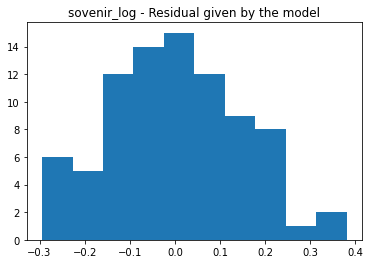

In [38]:
#Histogram of residuals - train data
plt.hist(sovenir_log_es_res)
plt.title('sovenir_log - Residual given by the model')
plt.show()

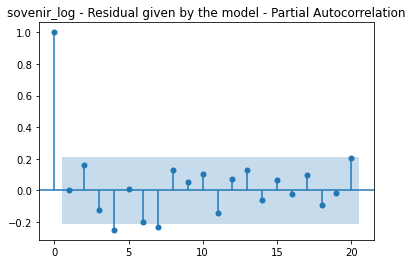

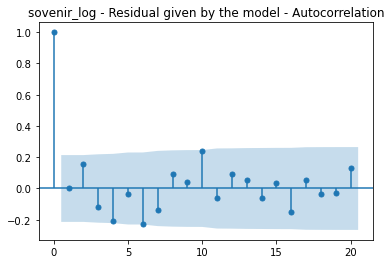

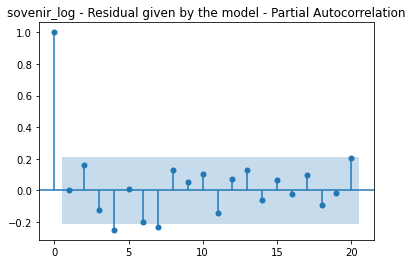

In [39]:
#Plotting acf & pacf - residual
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(sovenir_log_es_res, title='sovenir_log - Residual given by the model - Autocorrelation') 
plot_pacf(sovenir_log_es_res, title='sovenir_log - Residual given by the model - Partial Autocorrelation')

In [40]:
#Squaring residuals/ errors
sovenir_log_es_se = pow(sovenir_log_es_res,2)
sovenir_log_es_se.head()


month_year
1987-01-01    0.001784
1987-02-01    0.004598
1987-03-01    0.067308
1987-04-01    0.135754
1987-05-01    0.045223
dtype: float64

In [41]:
#average/mean of squared residuals/ errors
sovenir_log_es_mse = (sovenir_log_es_se.sum())/len(sovenir_log_es_se)
print(sovenir_log_es_mse) #0.02150398496214829


0.02150398496214829


In [42]:
#Root of average/mean of squared residuals/ errors
sovenir_log_es_rmse = sqrt(sovenir_log_es_mse)
print(sovenir_log_es_rmse) #0.14664237096469862


0.14664237096469862


In [43]:
#Forecasting next 19 periods
sovenir_log_es_pred = sovenir_log_es.forecast(19) #applied forecast not predict
sovenir_log_es_pred

1994-01-01     9.684425
1994-02-01     9.957981
1994-03-01    10.424537
1994-04-01    10.134725
1994-05-01    10.182217
1994-06-01    10.243564
1994-07-01    10.427249
1994-08-01    10.426822
1994-09-01    10.530264
1994-10-01    10.630340
1994-11-01    11.111735
1994-12-01    11.889328
1995-01-01    10.002743
1995-02-01    10.276299
1995-03-01    10.742855
1995-04-01    10.453043
1995-05-01    10.500535
1995-06-01    10.561882
1995-07-01    10.745567
Freq: MS, dtype: float64

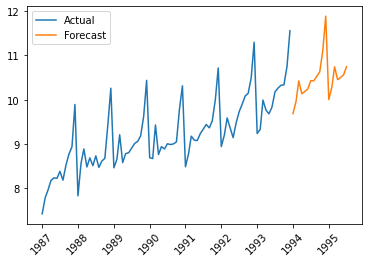

In [44]:
#Plot Test vs Pred
plt.plot(sovenir_log)
plt.plot(sovenir_log_es_pred)
plt.xticks(rotation=45)
plt.legend(['Actual', 'Forecast'])
plt.show()

In [45]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
sovenir_log_adf = adfuller(sovenir_log)


In [46]:
print('ADF Statistic: %f' % sovenir_log_adf[0])
print('p-value: %f' % sovenir_log_adf[1])
print('Critical Values:')
for key, value in sovenir_log_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.206646
p-value: 0.972632
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589


In [47]:
#p-value: 0.972632 ie > 0.5, Null Hypothesis accepted, Data is not stationary
#H0: Data is not stationary
'''When data is not stationary, apply differencing and check for stationarity'''


'When data is not stationary, apply differencing and check for stationarity'

In [48]:
#Differencing @1
sovenir_log1 = sovenir_log.diff() #default 1
sovenir_log1.head()
sovenir_log1 = sovenir_log1.dropna()
sovenir_log1.head()


month_year
1987-02-01    0.364728
1987-03-01    0.169615
1987-04-01    0.222130
1987-05-01    0.056361
1987-06-01   -0.010236
Name: sales, dtype: float64

In [49]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
sovenir_log1_adf = adfuller(sovenir_log1)


In [50]:
print('ADF Statistic: %f' % sovenir_log1_adf[0])
print('p-value: %f' % sovenir_log1_adf[1])
print('Critical Values:')
for key, value in sovenir_log1_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.962946
p-value: 0.038503
Critical Values:
	1%: -3.527
	5%: -2.904
	10%: -2.589


In [51]:
#p-value: 0.038503 ie < 0.05, Null Hypothesis rejected, Data is stationary
#H0: Data is not stationary


In [52]:
#Applying autoarima
from pmdarima import auto_arima


In [53]:
sovenir_log1_mod1 = auto_arima(sovenir_log1)
sovenir_log1_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -66.728
Date:                Sun, 05 Sep 2021   AIC                            139.457
Time:                        17:06:25   BIC                            146.713
Sample:                             0   HQIC                           142.372
                                 - 83                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4435      0.097     -4.573      0.000      -0.634      -0.253
ar.L2         -0.4253      0.168     -2.526      0.012      -0.755      -0.095
sigma2         0.2905      0.043      6.773      0.000       0.206       0.375
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                23.93
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.87
Prob(H) (two-sided):                  0.92   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
#Residual given by the model
sovenir_log1_mod1_res = sovenir_log1_mod1.resid()
sovenir_log1_mod1_res
sovenir_log1_mod1_res = pd.DataFrame(sovenir_log1_mod1_res, index=sovenir_log1.index)
sovenir_log1_mod1_res


,0
month_year,
1987-02-01,0.364728
1987-03-01,0.283115
1987-04-01,0.452474
1987-05-01,0.227019
1987-06-01,0.109231
...,...
1993-08-01,0.304178
1993-09-01,0.249333
1993-10-01,0.076922


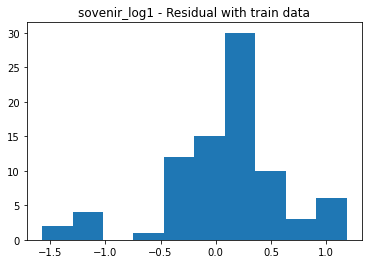

In [55]:
#Histogram of residuals
plt.hist(sovenir_log1_mod1_res)
plt.title('sovenir_log1 - Residual with train data')
plt.show()


C:\Program Files\ancondapython\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


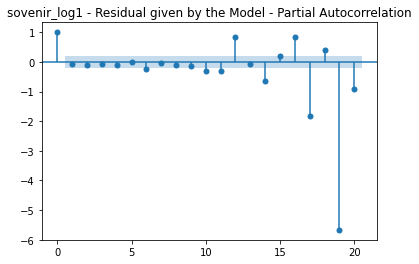

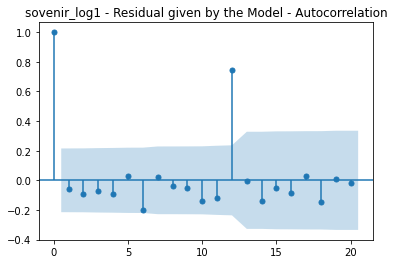

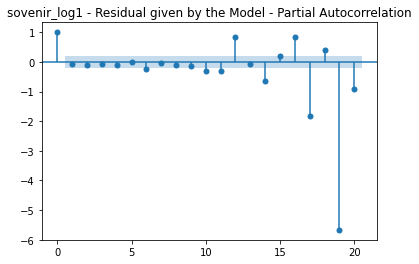

In [56]:
#Plotting acf & pacf - residual
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(sovenir_log1_mod1_res, title='sovenir_log1 - Residual given by the Model - Autocorrelation') 
plot_pacf(sovenir_log1_mod1_res, title='sovenir_log1 - Residual given by the Model - Partial Autocorrelation')


In [57]:
#Squaring residuals/ errors
sovenir_log1_mod1_se = pow(sovenir_log1_mod1_res,2)
sovenir_log1_mod1_se.head()

,0
month_year,
1987-02-01,0.133027
1987-03-01,0.080154
1987-04-01,0.204733
1987-05-01,0.051537
1987-06-01,0.011931


In [58]:
#average/mean of squared residuals/ errors
sovenir_log1_mod1_mse = (sovenir_log1_mod1_se.sum())/len(sovenir_log1_mod1_se)
print(sovenir_log1_mod1_mse) #0.291135


0    0.291135
dtype: float64


In [59]:
#Root of average/mean of squared residuals/ errors
sovenir_log1_mod1_rmse = sqrt(sovenir_log1_mod1_mse)
print(sovenir_log1_mod1_rmse) #0.5395696486390393


0.5395696486390393


In [60]:
#Forecasting next 19 periods
sovenir_log1_mod1_pred = sovenir_log1_mod1.predict(19)
sovenir_log1_mod1_pred = pd.DataFrame(sovenir_log1_mod1_pred, 
                                      index=pd.date_range(start='1994-01-01', 
                                                          periods=19, freq='MS'))
sovenir_log1_mod1_pred

,0
1994-01-01,-0.534673
1994-02-01,-0.106647
1994-03-01,0.274691
1994-04-01,-0.076480
1994-05-01,-0.082900
1994-06-01,0.069295
1994-07-01,0.004521
1994-08-01,-0.031476
1994-09-01,0.012038
1994-10-01,0.008047


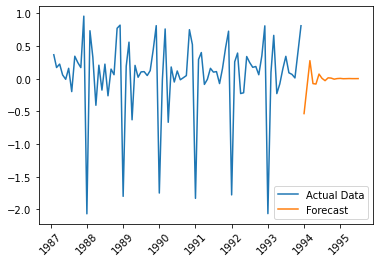

In [61]:
#Plot Actual & forecast
plt.plot(sovenir_log1)
plt.plot(sovenir_log1_mod1_pred)
plt.legend(['Actual Data', 'Forecast'])
plt.xticks(rotation=45)
plt.show()